In [2]:
import pandas as pd
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
import os
os.getcwd()

'/Users/luisfelipevelez/ds-homework'

In [11]:
pd.read_csv??

In [33]:
# load the data
df = pd.read_csv("LoanStats_2016Q2.csv")
df.columns = df.iloc[0]
df.drop(df.index[[0, 97855, 97856, 97857, 97858]],inplace=True) #dropping rows that we don't need 

Variables to keep:
grade 
sub_grade
home_ownership
annual_inc
int_rate
loan_status
dti
total_acc
revol_bal
revol_util
num_sats
open_acc
pymnt_plan
emp_length
fico_range_high
fico_range_low
mort_acc
avg_cur_bal

In [38]:
df1 = df[['grade','sub_grade','home_ownership','annual_inc','int_rate','loan_status','dti','total_acc','revol_bal'
          ,'revol_util', 'num_sats','open_acc','pymnt_plan','emp_length','mort_acc']]

In [41]:
df1.head()

,grade,sub_grade,home_ownership,annual_inc,int_rate,loan_status,dti,total_acc,revol_bal,revol_util,num_sats,open_acc,pymnt_plan,emp_length,mort_acc
1,D,D5,RENT,144000,21.49%,Current,18.07,48,9138,52.80%,17,17,n,10+ years,3
2,A,A2,RENT,135000,6.99%,Current,7.61,13,11943,30.10%,7,7,n,2 years,0
3,C,C2,MORTGAGE,70000,13.49%,Current,25,23,14214,58.70%,13,13,n,10+ years,3
4,C,C5,RENT,42000,15.59%,Current,8.34,16,2673,48.60%,5,5,n,10+ years,0
5,D,D1,MORTGAGE,98000,16.99%,Current,13.9,11,294,3.30%,7,7,n,10+ years,1


In [63]:
df1.emp_length.value_counts(dropna=False)

10+ years    33403
2 years       9031
3 years       7826
< 1 year      7136
1 year        6753
n/a           6466
5 years       5951
4 years       5759
8 years       4322
6 years       4084
9 years       3887
7 years       3186
Name: emp_length, dtype: int64

In [58]:
df1.dropna(inplace=True)
df1.isnull().sum()

/Users/luisfelipevelez/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


0
grade             0
sub_grade         0
home_ownership    0
annual_inc        0
int_rate          0
loan_status       0
dti               0
total_acc         0
revol_bal         0
revol_util        0
num_sats          0
open_acc          0
pymnt_plan        0
emp_length        0
mort_acc          0
dtype: int64

In [59]:
df1.home_ownership.value_counts(dropna=False)

MORTGAGE    47128
RENT        38343
OWN         12333
Name: home_ownership, dtype: int64

In [66]:
df1.loan_status.value_counts(dropna=False)

Current               90089
Fully Paid             4952
Late (31-120 days)     1165
In Grace Period         828
Late (16-30 days)       530
Charged Off             239
Default                   1
Name: loan_status, dtype: int64

In [84]:
df1.groupby('loan_status').describe()

0                          annual_inc       dti emp_length  grade  \
loan_status                                                         
Charged Off        count        239.0    239.00        239    239   
                   unique       121.0    232.00         12      7   
                   top        60000.0      8.25  10+ years      C   
                   freq          14.0      2.00         56     73   
Current            count      90089.0  90089.00      90089  90089   
                   unique      8800.0   7639.00         12      7   
                   top        60000.0     18.00  10+ years      B   
                   freq        2979.0     62.00      30795  27684   
Default            count          1.0      1.00          1      1   
                   unique         1.0      1.00          1      1   
                   top        27500.0     25.67  10+ years      D   
                   freq           1.0      1.00          1      1   
Fully Paid         count       4952.0   4952.00       4952   4952   
                   unique       959.0   2867.00         12      7   
                   top        60000.0     15.47  10+ years      C   
                   freq         180.0      7.00       1795   1411   
In Grace Period    count        828.0    828.00        828    828   
                   unique       302.0    768.00         12      7   
                   top        60000.0     25.50  10+ years      C   
                   freq          34.0      3.00        270    239   
Late (16-30 days)  count        530.0    530.00        530    530   
                   unique       205.0    491.00         12      7   
                   top        60000.0     19.20  10+ years      C   
                   freq          32.0      3.00        158    169   
Late (31-120 days) count       1165.0   1165.00       1165   1165   
                   unique       379.0   1017.00         12      7   
                   top        60000.0      4.18  10+ years      C   
                   freq          43.0      4.00        328    306   

0                         home_ownership int_rate  mort_acc  num_sats  \
loan_status                                                             
Charged Off        count             239      239       239     239.0   
                   unique              3       38         8      30.0   
                   top              RENT   15.31%         0       8.0   
                   freq              105       19       129      26.0   
Current            count           90089    90089     90089   90089.0   
                   unique              3       74        36     111.0   
                   top          MORTGAGE    7.39%         0       9.0   
                   freq            43509     5349     34128    7138.0   
Default            count               1        1         1       1.0   
                   unique              1        1         1       1.0   
                   top          MORTGAGE   17.27%         4       9.0   
                   freq                1        1         1       1.0   
Fully Paid         count            4952     4952      4952    4952.0   
                   unique              3       73        26      76.0   
                   top          MORTGAGE   11.99%         0       9.0   
                   freq             2495      289      1624     401.0   
In Grace Period    count             828      828       828     828.0   
                   unique              3       68        18      57.0   
                   top          MORTGAGE   15.31%         0       9.0   
                   freq              371       50       308      63.0   
Late (16-30 days)  count             530      530       530     530.0   
                   unique              3       56        14      38.0   
                   top              RENT   15.31%         0       8.0   
                   freq              237       40       220      52.0   
Late (31-120 days) count       

In [104]:
df1.head()

,grade,sub_grade,home_ownership,annual_inc,int_rate,loan_status,dti,total_acc,revol_bal,revol_util,num_sats,open_acc,pymnt_plan,emp_length,mort_acc
1,D,D5,RENT,144000.0,21.49%,Current,18.07,48,9138,52.80%,17,17,n,10+ years,3
2,A,A2,RENT,135000.0,6.99%,Current,7.61,13,11943,30.10%,7,7,n,2 years,0
3,C,C2,MORTGAGE,70000.0,13.49%,Current,25.00,23,14214,58.70%,13,13,n,10+ years,3
4,C,C5,RENT,42000.0,15.59%,Current,8.34,16,2673,48.60%,5,5,n,10+ years,0
5,D,D1,MORTGAGE,98000.0,16.99%,Current,13.90,11,294,3.30%,7,7,n,10+ years,1


In [ ]:
#Need to convert interest rate and revolver utilization into numbers through another way, as percentage sign is a problem 
df1['int_rate'] = df1['int_rate'].map(lambda x: x.rstrip('%'))
df1['revol_util'] = df1['revol_util'].map(lambda x: x.rstrip('%'))
df1['int_rate'] = df1['int_rate'].map(lambda x: x/100)
df1['revol_util'] = df1['revol_util'].map(lambda x: x/100)

In [115]:
df1[['annual_inc','dti','total_acc','revol_bal','num_sats','open_acc','mort_acc','int_rate','revol_util']] = df1[['annual_inc','dti','total_acc','revol_bal','num_sats','open_acc','mort_acc','int_rate','revol_util']].apply(pd.to_numeric)

In [119]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97804 entries, 1 to 97854
Data columns (total 15 columns):
grade             97804 non-null object
sub_grade         97804 non-null object
home_ownership    97804 non-null object
annual_inc        97804 non-null float64
int_rate          97804 non-null float64
loan_status       97804 non-null object
dti               97804 non-null float64
total_acc         97804 non-null float64
revol_bal         97804 non-null float64
revol_util        97804 non-null float64
num_sats          97804 non-null float64
open_acc          97804 non-null float64
pymnt_plan        97804 non-null object
emp_length        97804 non-null object
mort_acc          97804 non-null float64
dtypes: float64(9), object(6)
memory usage: 11.9+ MB


In [120]:
df1.head(2)

,grade,sub_grade,home_ownership,annual_inc,int_rate,loan_status,dti,total_acc,revol_bal,revol_util,num_sats,open_acc,pymnt_plan,emp_length,mort_acc
1,D,D5,RENT,144000.0,0.2149,Current,18.07,48.0,9138.0,0.528,17.0,17.0,n,10+ years,3.0
2,A,A2,RENT,135000.0,0.0699,Current,7.61,13.0,11943.0,0.301,7.0,7.0,n,2 years,0.0


In [124]:
df1.corr()

,annual_inc,int_rate,dti,total_acc,revol_bal,revol_util,num_sats,open_acc,mort_acc
0,,,,,,,,,
annual_inc,1.000000,-0.079689,-0.024625,0.156581,0.249203,0.034188,0.118271,0.118601,0.205417
int_rate,-0.079689,1.000000,0.018687,-0.034805,-0.042560,0.197926,0.009696,0.009741,-0.119641
dti,-0.024625,0.018687,1.000000,0.011422,0.008230,0.022256,0.014913,0.014845,-0.002498
total_acc,0.156581,-0.034805,0.011422,1.000000,0.187248,-0.112104,0.723075,0.726392,0.345540
revol_bal,0.249203,-0.042560,0.008230,0.187248,1.000000,0.253840,0.220235,0.222776,0.230410
revol_util,0.034188,0.197926,0.022256,-0.112104,0.253840,1.000000,-0.140195,-0.139418,0.028363
num_sats,0.118271,0.009696,0.014913,0.723075,0.220235,-0.140195,1.000000,0.998685,0.129019
open_acc,0.118601,0.009741,0.014845,0.726392,0.222776,-0.139418,0.998685,1.000000,0.131915
mort_acc,0.205417,-0.119641,-0.002498,0.345540,0.230410,0.028363,0.129019,0.131915,1.000000


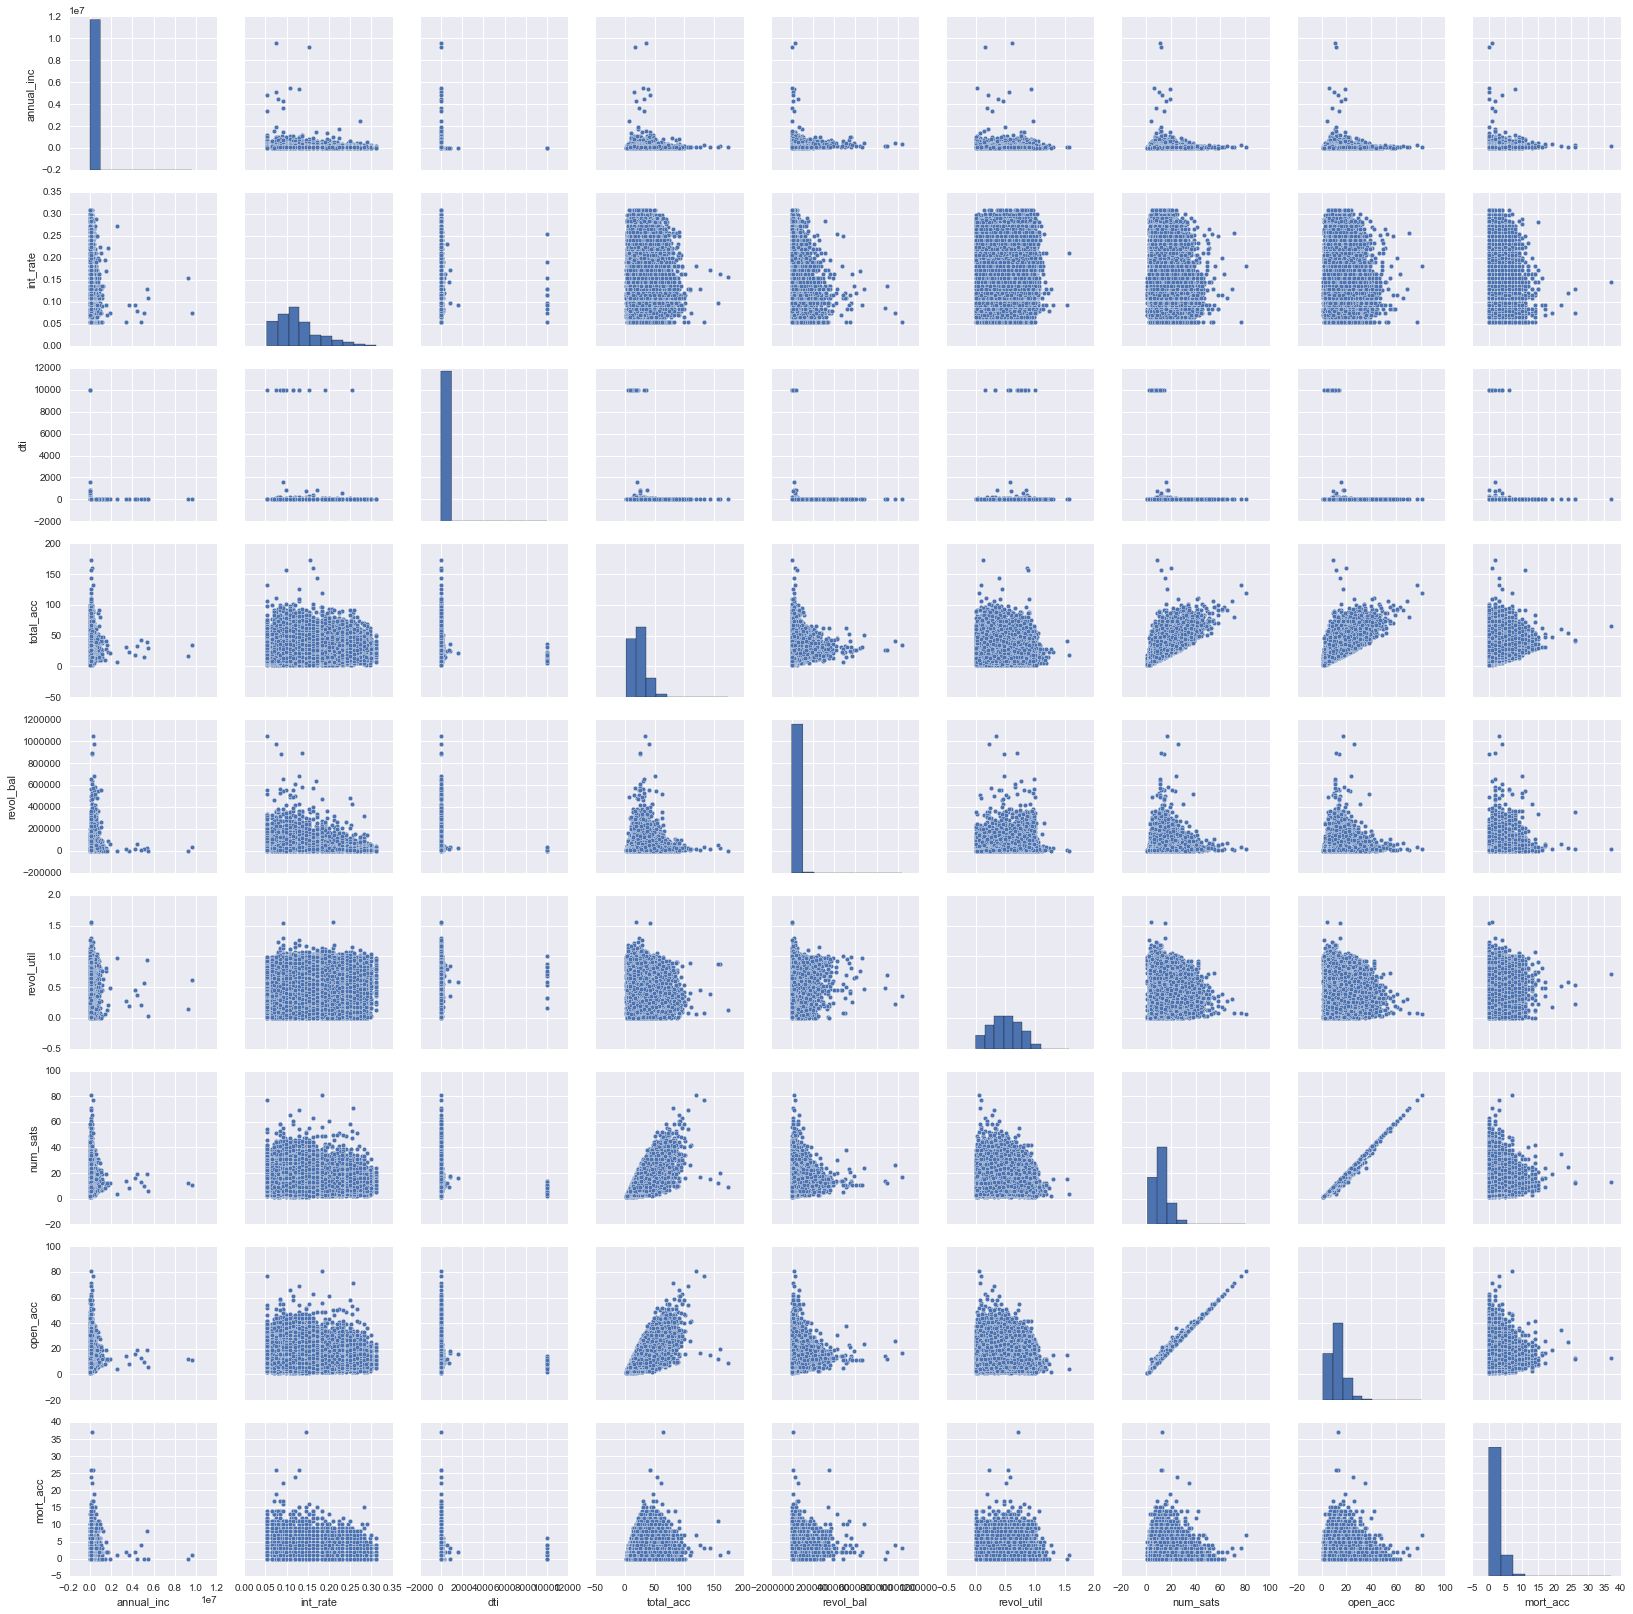

In [125]:
sns.pairplot(df1);

In [126]:
df1.groupby('loan_status').dti.mean()

loan_status
Charged Off           19.938494
Current               20.424887
Default               25.670000
Fully Paid            18.095224
In Grace Period       31.577911
Late (16-30 days)     20.818472
Late (31-120 days)    20.419597
Name: dti, dtype: float64

In [134]:
#high correlation between open_acc and num_sats, so will eliminate num_sats

df1 = df1.drop("num_sats", axis=1)

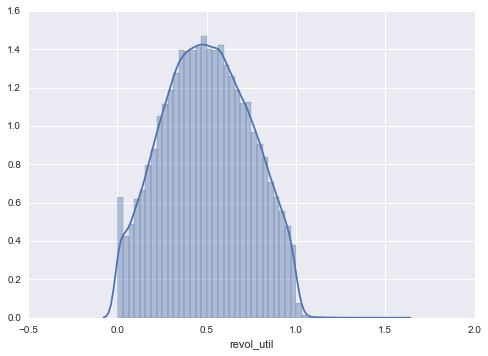

In [129]:
sns.distplot(df1.revol_util)


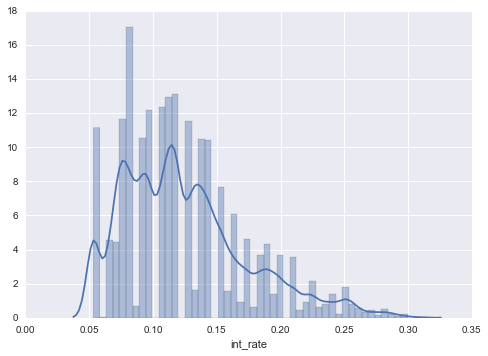

In [130]:
sns.distplot(df1.int_rate)

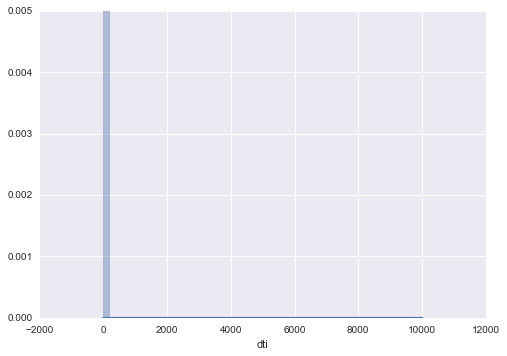

In [136]:
sns.distplot(df1.dti)

In [144]:
#something's up with DTI, maybe an outlier? Some data points have DTI = 10,000 and they seem to be wrong.
df2 = df1[df.dti < 100]

/Users/luisfelipevelez/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


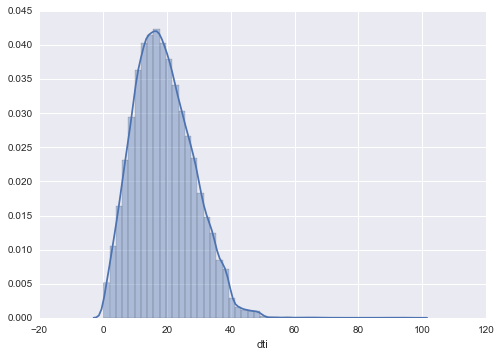

In [145]:
sns.distplot(df2.dti)

DTI seem to be normalized at values under 60. Seems to be an error of this specific data set at 2016Q2. Maybe it's not repeated across the different timeframes. Should make sure before I use them, and slice all datasets accordingly.   

In [ ]:
sns.pairplot(df2)